<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Cuauhtémoc Corrales Camacho y Berlín Isabel Preciado Escalera.

**Fecha:** 23 de noviembre del 2021.

**Expedientes** : 720482 , 723259.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/CuauhtemocCC/Tarea8_CCORRALES_BIPRECIADO

# Tarea 8
    

Una opción puede negociarse en el mercado secundario por lo que es importante determinar su valor $V_t$ para cada tiempo $t\in [0, T]$. La ganancia que obtiene quién adquiere la opción se llama función de pago o "payoff" y claramente depende del valor del subyacente. 

Hay una gran variedad de opciones en el mercado y éstas se clasiflcan según su función de pago y la forma en que pueden ejercerse.  Las opciones que tienen como función de pago a
$$ P(S(t),t)=max\{S(T)-K,0\} \rightarrow \text{En el caso de Call}$$ 
$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 
se llaman opciones **Vainilla**, con $h:[0,\infty) \to [0,\infty)$.

La opción se llama **europea** si puede ejercerse sólo en la fecha de vencimiento.

Se dice que una opción es **americana** si puede ejercerse en cualquier momento antes o en la fecha de vencimiento

## Ejercicio: 


# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de comparar con los resultados teoricos del método de valuación de Black-Scholes (ecuación del principio de clase)

In [4]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

# Código de solución Cuauhtémoc Corrales

## Extraccion de datos y calculos iniciales

In [9]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

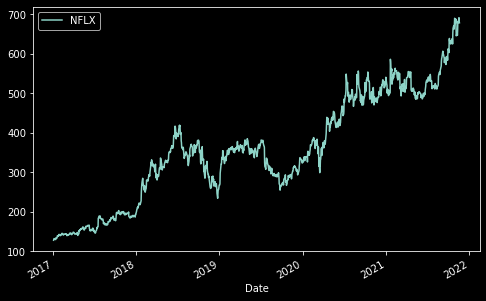

In [58]:
# Grafica de los precios de cierre de Netflix
plt.style.use(['dark_background'])

ticker = ['NFLX']
start_date = '2017-01-01'

closes_net = get_adj_closes(ticker, start_date)
closes_net.plot(figsize=(8,5));
plt.legend(ticker);

In [59]:
# Ultimo precio de cierre de la accion
closes_net.iloc[-1]

Symbols
NFLX    678.8
Name: 2021-11-19 00:00:00, dtype: float64

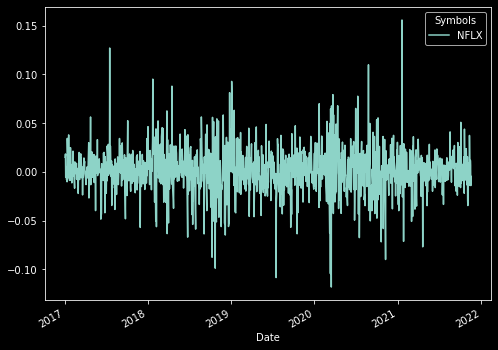

In [97]:
# Grafica de los rendimientos de Netflix
ret_net = calc_daily_ret(closes_net)
ret_net.plot(figsize=(8,6));

In [17]:
# Asignacion de las fechas a simular, se usaron 90 dias y 10000 escenarios posibles.

from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-03-25'

nscen = 10000
dates = pd.date_range(start=today, end=expiry, freq='B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
                '2021-11-26', '2021-11-29', '2021-11-30', '2021-12-01',
                '2021-12-02', '2021-12-03', '2021-12-06', '2021-12-07',
                '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-13',
                '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17',
                '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
                '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29',
                '2021-12-30', '2021-12-31', '2022-01-03', '2022-01-04',
                '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-10',
                '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14',
                '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
                '2022-01-21', '2022-01-24', '2022-01-25', '2022-01-26',
                '2022-01-27', '2022-01-28', '2022-01-31', '2022-02-01',
                '2022-02-02', '2022-02-03', '2022-02-04', '2022-

**Calculo de rendimientos simples y su simulacion de precios**

In [61]:
# Obtenemos el rendimiento simple
Ri = closes_net.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri.head()

Symbols,NFLX
Date,
2017-01-04,1.506e-02
2017-01-05,1.855e-02
2017-01-06,-5.614e-03
2017-01-09,-9.156e-04
2017-01-10,-8.095e-03


In [62]:
# Simulacion de precios por rendmientos simples
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
S_0 = closes_net.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()
S_T.head()

,0,1,2,...,7,8,9
2021-11-22,666.361,675.971,663.739,...,688.558,659.907,693.875
2021-11-23,679.174,669.393,674.554,...,668.457,650.345,697.951
2021-11-24,696.890,703.699,655.543,...,671.330,647.637,699.581
2021-11-25,687.946,730.268,639.954,...,675.312,619.554,639.738
2021-11-26,683.073,711.289,656.951,...,667.542,572.329,650.897


**Calculo de rendimientos logaritmicos y su simulacion de precios**

In [63]:
# Calculo de rendimientos logaritmicos
ri = calc_daily_ret(closes_net)
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# Simulacion a partir de los rendimientos logaritmicos
sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())
S_T2.head()

,0,1,2,...,7,8,9
2021-11-22,666.331,675.795,663.772,...,688.394,660.049,693.787
2021-11-23,679.024,669.084,674.441,...,668.472,650.405,697.660
2021-11-24,696.700,703.930,655.583,...,671.149,647.528,699.085
2021-11-25,687.654,730.702,640.052,...,674.934,619.976,641.798
2021-11-26,682.624,711.824,657.026,...,667.053,574.479,652.861


## Calculo de la prima de la opcion PUT a partir del modelo de B&S

Segun los datos de investing.com, el valor de la prima de la opcion PUT con un precio strike de 670 es de 46. A partir de amabas simulaciones, veremos si nos acercamos a dicho valor. La fecha de vencimiento debe ser en marzo de 2022 Se considera que:
$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 

Prima    21.264
Name: 2022-02-18 00:00:00, dtype: float64

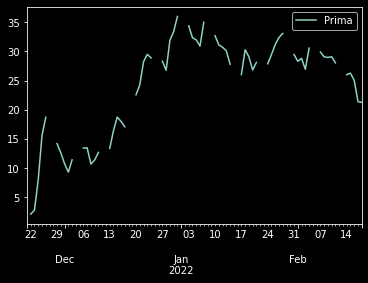

In [81]:
# Simulacion mediante rendimientos simples
strike = 670
put_s = pd.DataFrame({'Prima':np.exp(-mu_R*ndays) \
              *np.fmax(0, strike-S_T).mean(axis=1)}, index=dates)
put_s.plot();
put_s.iloc[-1]

Prima    21.425
Name: 2022-02-18 00:00:00, dtype: float64

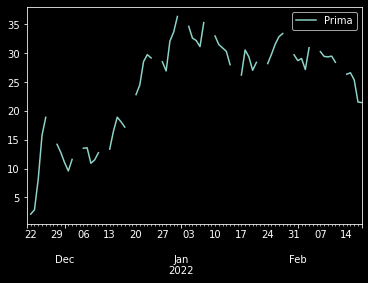

In [82]:
# Simulacion mediante rendimientos logaritmicos
strike = 670
put_l = pd.DataFrame({'Prima':np.exp(-mu_r*ndays) \
              *np.fmax(0, strike-S_T2).mean(axis=1)}, index=dates)
put_l.plot();
put_l.iloc[-1]

**Conclusion del metodo**

El calculo de la prima por los rendimientos puros es muy ineficiente, ya que el valor real de la prima es de 46, y ambos metodos dieron un valor de 21, muy alejado al objetivo.

## Simulacion mediante metricas de distribuicion normal

In [64]:
# Para esta etapa se usaran los rendimientos logaritmicos
ri = calc_daily_ret(closes_net)
mu = ri.mean()[0]
sigma = ri.std()[0]
mu,sigma

(0.0013595842292543508, 0.024081921319827906)

In [65]:
# La tasa libre de riesgo de EUA a 1 año es de 0.18%
r = 0.0018/360 # Tasa diaria

In [66]:
# Se establecen las fechas futuras y el numero de escenarios
today = pd.Timestamp(date.today())
expiry = pd.to_datetime('2022-03-25')
nscen = 10
dates = pd.date_range(start=today, end = expiry, freq='B')
ndays = len(dates)

In [67]:
# Simulacion de los precios 
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.head()

,0,1,2,...,7,8,9
2021-11-22,672.724,668.057,694.719,...,652.604,666.847,676.992
2021-11-23,634.186,668.487,706.940,...,672.689,644.649,699.326
2021-11-24,664.294,678.807,722.440,...,682.724,631.576,732.251
2021-11-25,647.335,690.507,732.158,...,678.715,647.584,732.051
2021-11-26,639.141,704.957,734.504,...,685.790,645.937,750.037


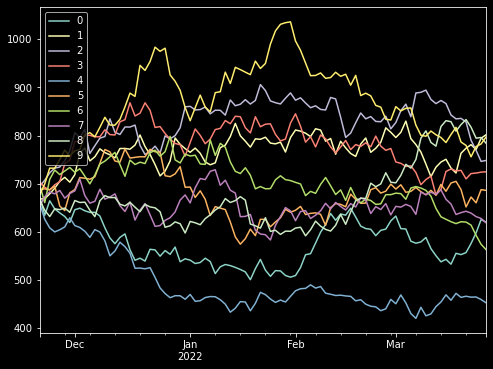

In [68]:
# Graficas de las simulaciones (Caminata Aleatoria)
sim_closes.plot(figsize=(8,6));

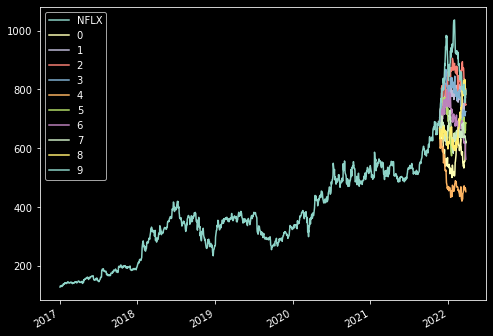

In [69]:
# Grafica de los historicos mas la simulaciones
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [74]:
# Simulacion de los precios
Hoy = date.today()
K = 150  # strike price
nscen = 10000
dates = pd.date_range(start= Hoy, periods = ndays)
ndays = len(dates)
S0 = closes_net.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0, :] = 678 # Precio actual
sim_closes.head()

,0,1,2,...,9997,9998,9999
2021-11-21,678.000,678.000,678.000,...,678.000,678.000,678.000
2021-11-22,694.384,660.813,656.578,...,686.610,723.204,719.439
2021-11-23,692.932,658.172,677.042,...,690.869,736.607,710.784
2021-11-24,695.087,656.000,659.548,...,697.553,751.841,715.808
2021-11-25,696.104,689.815,662.404,...,708.488,759.579,728.714


Prima    49.807
Name: 2022-02-18 00:00:00, dtype: float64

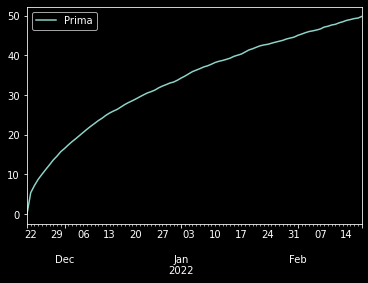

In [83]:
strike = 670
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(0, strike-sim_closes).mean(axis=1)}, index=dates)
put.plot();
put.iloc[-1]

In [76]:
# Creaacion de un intervalo de confianza de la prima asl 99%
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(72.95095714652096, 81.35278560387961)
(72.95175905638627, 81.35198369401431)


**Conclusion del metodo**

Este metodo fue mas preciso que la simulacion pura por metodo de rendimientos, ya que aumento el valor de 21 a 49, aun asi el valor esperado de la prima es de 46, por lo cual aun falta hacer ajustes

## Simulacion más Instauracion de los metodos de reduccion de varianza

Prima    53.753
Name: 2022-02-18 00:00:00, dtype: float64

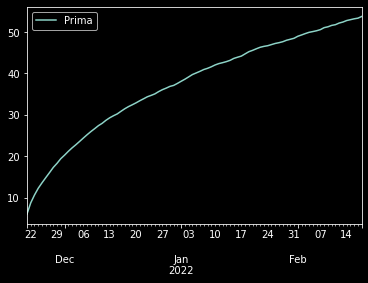

In [80]:
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())
K = 678 # Strike

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();
put.iloc[-1]

In [84]:
# Intervalo de confianza al 99%
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(45.60570073023436, 54.00752918759301)
(45.60570073023436, 54.00752918759301)


**Conlusion del metodo**

La instauracion de la reduccion de varianza ha provocado cambios en el precio de la prima, llevandola a 53, mas en su intervalo de confianza si considera el precio real de la prima.

**Ajustes de las distribucion, ¿norm o t?**

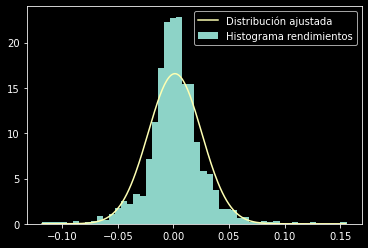

In [87]:
# Grafica del nivel de ajuste de una distribuicion normal
ren = calc_daily_ret(closes_net) # rendimientos 
y,x,des = plt.hist(ren['NFLX'],bins=50,density=True,label='Histograma rendimientos')
mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

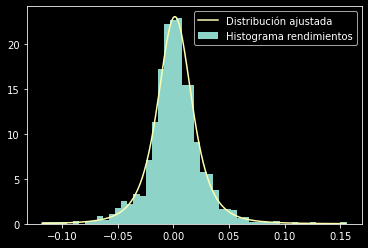

In [91]:
# Grafica del nivel de ajuste de una distribuicion t
ren = calc_daily_ret(closes_net) # rendimientos 
y,x,des = plt.hist(ren['NFLX'],bins=50,density=True,label='Histograma rendimientos')
dof,mu_fit,sd_fit = st.t.fit(ren.values) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
# ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.t.pdf(ren_gen, df=dof,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

Como se puede observar, la distribucion t se ajusta mas a los datos que la distribuicion normal.

## Simulacion por los histogramas de los rendimientos

In [88]:
# Metricas iniciales
ndays = 90
nscen = 10
prob = y/np.sum(y)
values = x[1:]

In [94]:
# Simulacion de los precios
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist.head()

,0,1,2,...,7,8,9
2021-11-21,695.503,691.704,687.926,...,676.715,684.168,684.168
2021-11-22,682.066,728.401,682.066,...,682.066,660.016,685.812
2021-11-23,672.563,691.236,714.329,...,679.971,661.602,687.460
2021-11-24,696.702,739.967,712.134,...,696.702,677.882,659.570
2021-11-25,675.799,766.526,717.766,...,698.377,702.212,668.437


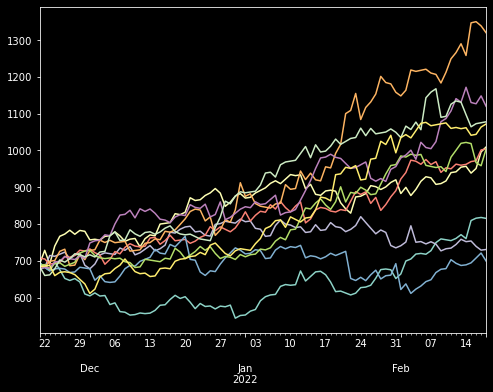

In [96]:
# Grafica de las simulaciones en forma de caminata aleatoria
sim_closes_hist.plot(figsize=(8,6),legend=False);

In [99]:
# Histograma de los precios
K= 678
ndays = 90
nscen = 10000
freq, values = np.histogram(ret_net+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2021-11-21',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_net.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

Prima    50.343
Name: 2022-02-18 00:00:00, dtype: float64

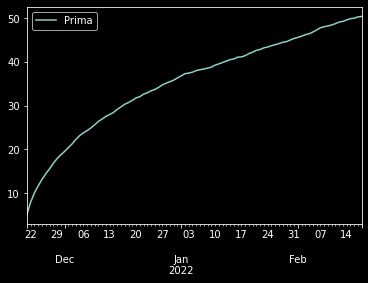

In [101]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot()
put_hist.iloc[-1]

In [102]:
# Intervalo de confianza
confianza = 0.99
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)



(46.204990875589026, 54.48098108437892)
(46.204990875589026, 54.48098108437892)


**Conclusion del metodo**

Este metodo fue mas eficiente que la reduccion de varianza ya que se acerco mucho mas a su valor real. Tal vez si se simulan mas escenarios, el precio sera mas aproximado a la realidad. 

# Código de solución Berlín I. Preciado